Homework 2

Machine Learning Engineering

Caleb Malinowski

09/26/2025

**Question 1**

In [4]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()

X = iris.data
y = iris.target

# define the two new features, do not use any original features

# first select whole iris dataset now since using all four  original features for new ones
X = iris.data
y = iris.target

# two new features now (length divided by width of sepals and petals, respectively)
a = X[:, 0] / X[:, 1] # first, sepals
b = X[:, 2] / X[:, 3] # second, petals
features = np.column_stack((a, b))


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(
    features, y,
    test_size=0.30,
    train_size=0.70,
    random_state=123,
    shuffle=True,
    stratify=y)


from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,clf.predict(X_test) )
print('accuracy score :', acc)

accuracy score : 0.8222222222222222


**Question 2**

(60000, 28, 28)
(60000,)
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           2       0.99      0.98      0.99      1032
           4       0.99      0.99      0.99       982
           6       0.99      0.99      0.99       958
           8       0.99      0.97      0.98       974

    accuracy                           0.99      4926
   macro avg       0.99      0.99      0.99      4926
weighted avg       0.99      0.99      0.99      4926

Correct 6's: 949


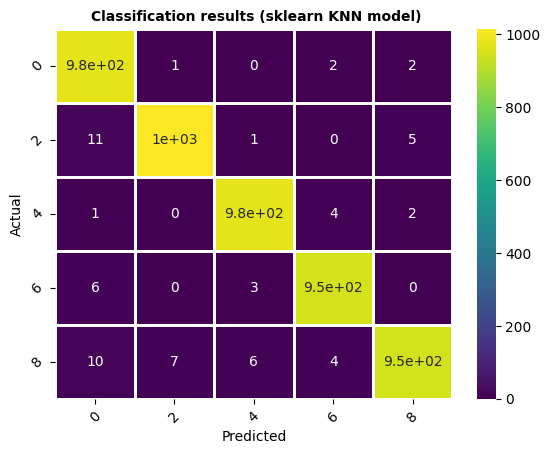

In [5]:
from keras.datasets import mnist
import numpy as np
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


#load the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)

#get only even digits
train = (y_train % 2 == 0)
test = (y_test % 2 == 0)

x_train_even = x_train[train]
y_train_even = y_train[train]

x_test_even = x_test[test]
y_test_even = y_test[test]

x_train_even = x_train_even.reshape(x_train_even.shape[0], -1)
x_test_even = x_test_even.reshape(x_test_even.shape[0], -1)


#knn model
from sklearn.neighbors import KNeighborsClassifier
skmodel = KNeighborsClassifier(n_neighbors=3)
skmodel.fit(x_train_even,y_train_even)

#prediction
predictions = skmodel.predict(x_test_even)

#confusion matrix
cm_sk = confusion_matrix(y_test_even, predictions)
labels = [0, 2, 4, 6, 8]
ax = sns.heatmap(cm_sk, linewidths=2, annot=True, cmap='viridis', cbar=True, xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted');
plt.ylabel('Actual');
plt.xticks(rotation=45);
plt.yticks(rotation=45);
plt.title(' Classification results (sklearn KNN model)', fontsize='medium', fontweight='bold');
print(classification_report(y_test_even, skmodel.predict(x_test_even)))


#how many 6's
six = (y_test_even == 6)
correct_sixes = np.sum(predictions[six] == 6)

print(f"Correct 6's: {correct_sixes}")


**Question 3**

cluster centroids: [[5.006      3.428      1.462     ]
 [5.86833333 2.74       4.38166667]
 [6.8525     3.07       5.6925    ]]


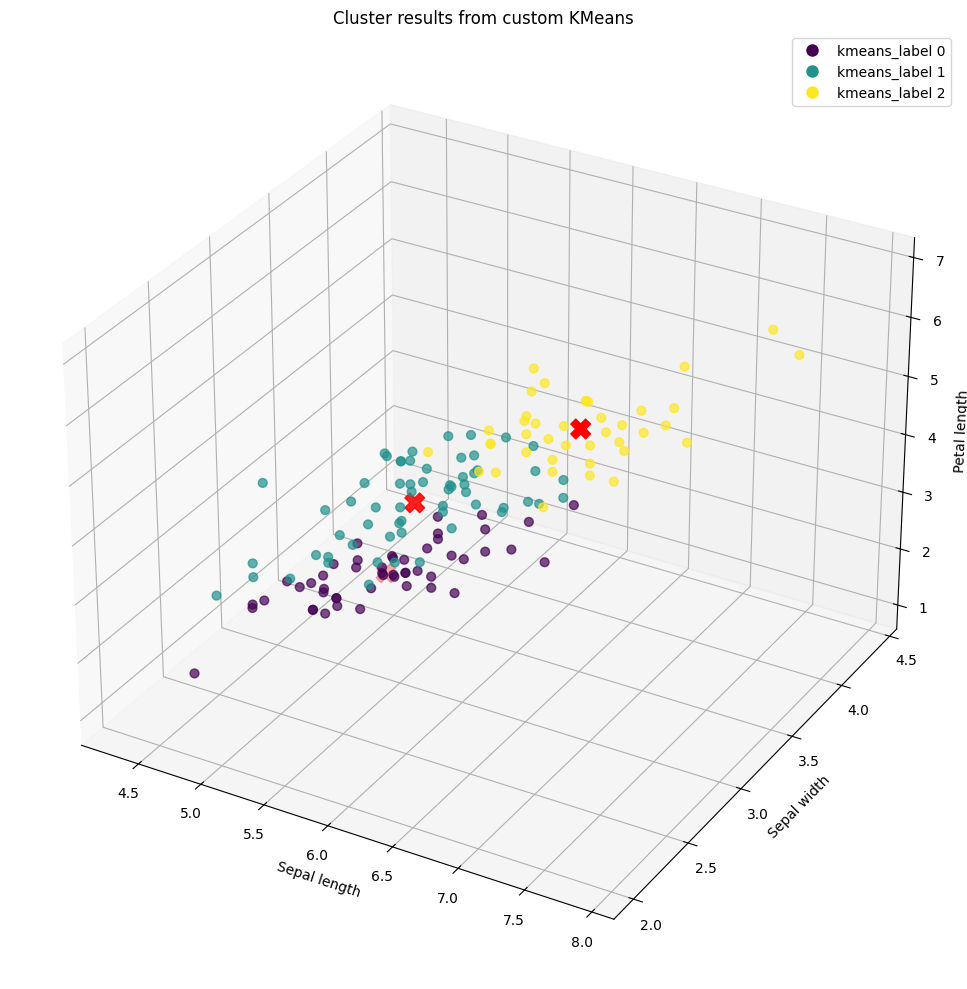

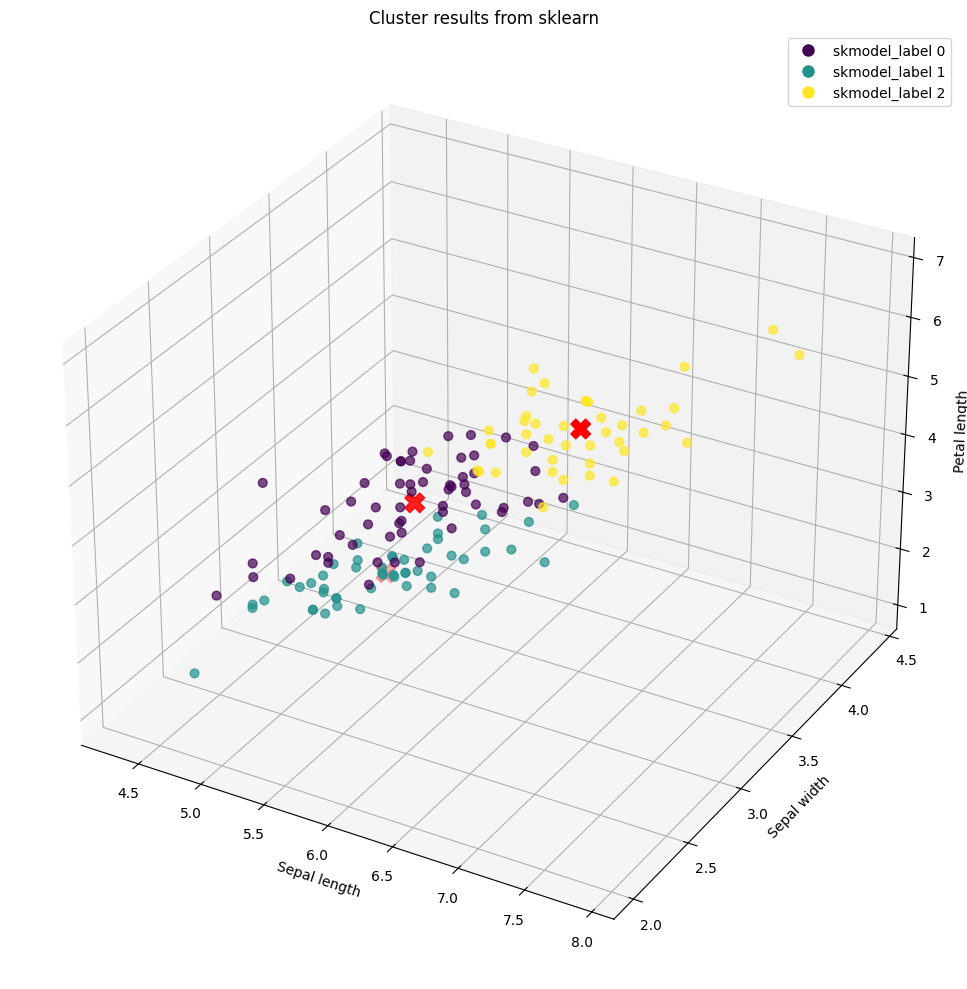

In [6]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


#load and prepare data
data = load_iris()
X = data.data[:, :3] # get three features


#k means custom algorithm from class
class KMeans:
    def __init__(self, k):
        self.k = k
        self.cluster_labels = None
    def fit(self, X):
        self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False), :]
        self.cluster_labels = np.arange(self.k)
        while True:
            distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
            self.clusters = np.argmin(distances, axis=0)
            new_centroids = np.array([X[self.clusters == i, :].mean(axis=0) for i in range(self.k)])
            # check convergence
            if np.array_equal(new_centroids, self.centroids):
                break
            else:
                self.centroids = new_centroids

    def predict(self, X):
        distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
        return self.cluster_labels[np.argmin(distances, axis=0)]

# predictions
model = KMeans(k=3)
model.fit(X)
kmeans_labels = model.predict(X)
cluster_coords = model.centroids
print('cluster centroids:', cluster_coords)


# plotting
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=kmeans_labels, cmap='viridis', s=40, alpha=0.7)
ax.scatter(model.centroids[:, 0], model.centroids[:, 1], model.centroids[:, 2], c='red', marker='X', s=200, edgecolors='r', label='Centroids')

ax.set_xlabel("Sepal length")
ax.set_ylabel("Sepal width")
ax.set_zlabel("Petal length")
ax.set_title("Cluster results from custom KMeans")

handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'kmeans_label {i}',
                      markerfacecolor=plt.cm.viridis(i / 2), markersize=10)
           for i in range(3)]
ax.legend(handles=handles, loc="best")

plt.tight_layout() # make the z-axis title show up
plt.show()


# -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-


# now implement sklearn for comparison
from sklearn.cluster import KMeans
skmodel = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init='auto',
    max_iter=300,
    tol=0.0001,
    verbose=0,
    random_state=None,
    copy_x=True,
    algorithm='lloyd',
)

skmodel.fit(X)

skmodel.labels_ # training labels
skmodel.predict(X) # predict labels, remember the integers do not make same sense in training and testing for clustering
skmodel_labels = skmodel.predict(X)

# plotting
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=skmodel_labels, cmap='viridis', s=40, alpha=0.7)
ax.scatter(model.centroids[:, 0], model.centroids[:, 1], model.centroids[:, 2], c='red', marker='X', s=200, edgecolors='r', label='Centroids')

ax.set_xlabel("Sepal length")
ax.set_ylabel("Sepal width")
ax.set_zlabel("Petal length")
ax.set_title("Cluster results from sklearn")

handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'skmodel_label {i}',
                      markerfacecolor=plt.cm.viridis(i / 2), markersize=10)
           for i in range(3)]
ax.legend(handles=handles, loc="best")

plt.tight_layout() # make the z-axis title show up
plt.show()

